##                 RETAIL GIANT SALES FORECAST ASSIGNMENT
### Problem Statement: 

Global Mart, an online supermarket store with its operations worldwide, wants to forecast its sales estimates for the next
6 months in order to plan proper inventory and business process accordingly.

### Brief Description of the stores operations:

The store has its customers from the golbal markets in three major product categories viz., consumer, corporate and home
office.The stores market is spread across the 7 geographies namely Africa, APAC(Asia Pacific), Canada, EMEA( Middle East),
EU(European Union),LATAM(Latin America), US(United states).Therefore, the stores operates on 21 unique Market Segments.

Due to certain market circumstances the company wants to forecast the sales only on one Market segment that is consistently profitable over a period of last 4 years.A Data set with past sales for a period 4 years is given for us to forecast for the
next 6 months.


## 1.0 Data Reading and Understanding

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


In [3]:
# Reading the data
df=pd.read_csv('Global+Superstore+Data.csv')

In [4]:
df.head(5)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [5]:
# Data Undertanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


Data has 5 columns in which only 2 are numerical(float).

In [6]:
df.shape

(51290, 5)

In [7]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


## 2. Data Preparation

In [8]:
# creating Market segments
df['Market_Segments']=df['Market']+'_'+df['Segment']

In [9]:
df.head(5)

,Order Date,Segment,Market,Sales,Profit,Market_Segments
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [10]:
# Changing the 'Order Date' to mm-yyyy format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y').dt.to_period('m')

In [11]:
df.head(2)

,Order Date,Segment,Market,Sales,Profit,Market_Segments
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate


In [12]:
df.nunique().sort_values()

Segment                3
Market                 7
Market_Segments       21
Order Date            48
Sales              22995
Profit             24575
dtype: int64

We can see that the stores has 3 market categories and 7 geographical market segments.Altogether, there are 21 unique market segments.We have to find out the one market segment which is consistently earning profits over the last 48 months. 

### 2.1 Exploratory Data Analysis

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


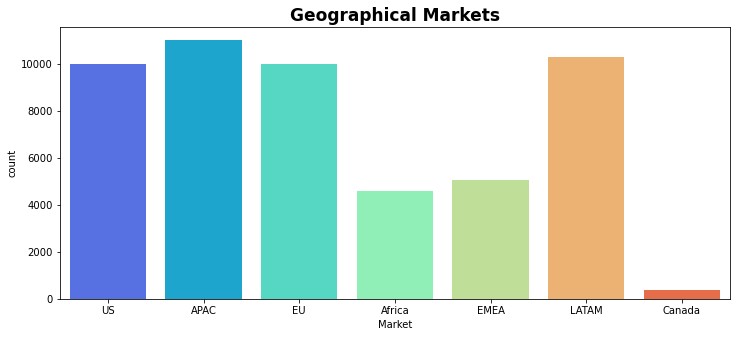

In [13]:
# plotting the geo graphical markets
plt.figure(figsize=(12,5))
print(df.Market.value_counts())
sns.countplot(df['Market'], palette='rainbow')
plt.title('Geographical Markets', fontweight='bold', size=17)
plt.show()

APAC, LATAM, US and EU are the major markets.

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


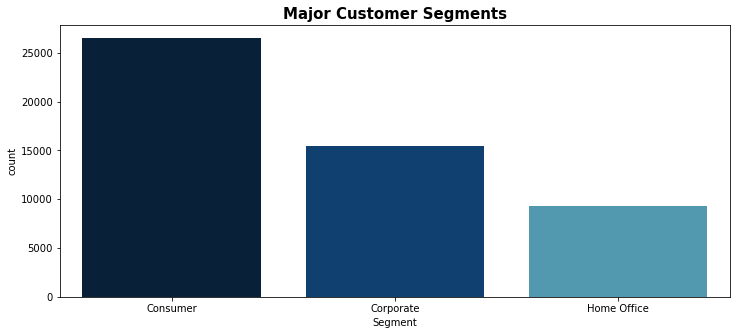

In [14]:
# Plotting customer segments
plt.figure(figsize=(12,5))
print(df.Segment.value_counts())
sns.countplot(df['Segment'], palette='ocean')
plt.title('Major Customer Segments',fontweight='bold', size=15)
plt.show()

We can see that the consumer segments is the largest segment with Corporate and Home office in second and third positions respectively.

APAC_Consumer         5699
LATAM_Consumer        5321
US_Consumer           5191
EU_Consumer           5186
APAC_Corporate        3283
EU_Corporate          3077
LATAM_Corporate       3053
US_Corporate          3020
EMEA_Consumer         2538
Africa_Consumer       2381
APAC_Home Office      2020
LATAM_Home Office     1920
US_Home Office        1783
EU_Home Office        1737
EMEA_Corporate        1574
Africa_Corporate      1312
EMEA_Home Office       917
Africa_Home Office     894
Canada_Consumer        202
Canada_Corporate       110
Canada_Home Office      72
Name: Market_Segments, dtype: int64


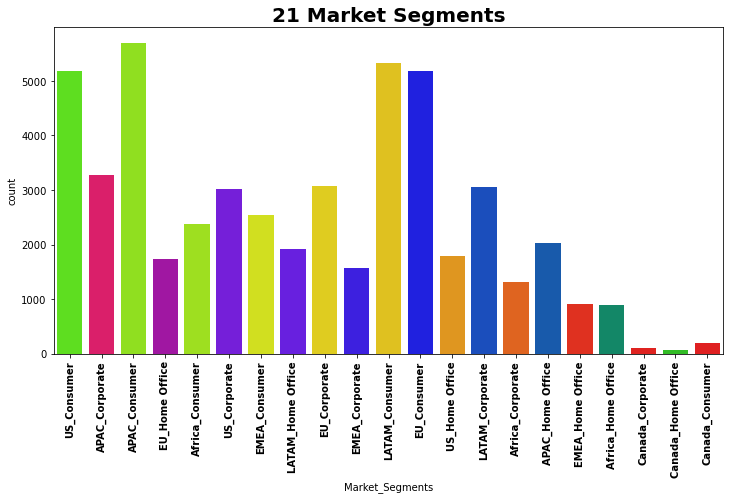

In [15]:
# Plotting 21 unique MArket Segments
plt.figure(figsize=(12,6))
print(df.Market_Segments.value_counts())
sns.countplot(df['Market_Segments'], palette='prism')
plt.title('21 Market Segments',fontweight='bold', size=20)
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

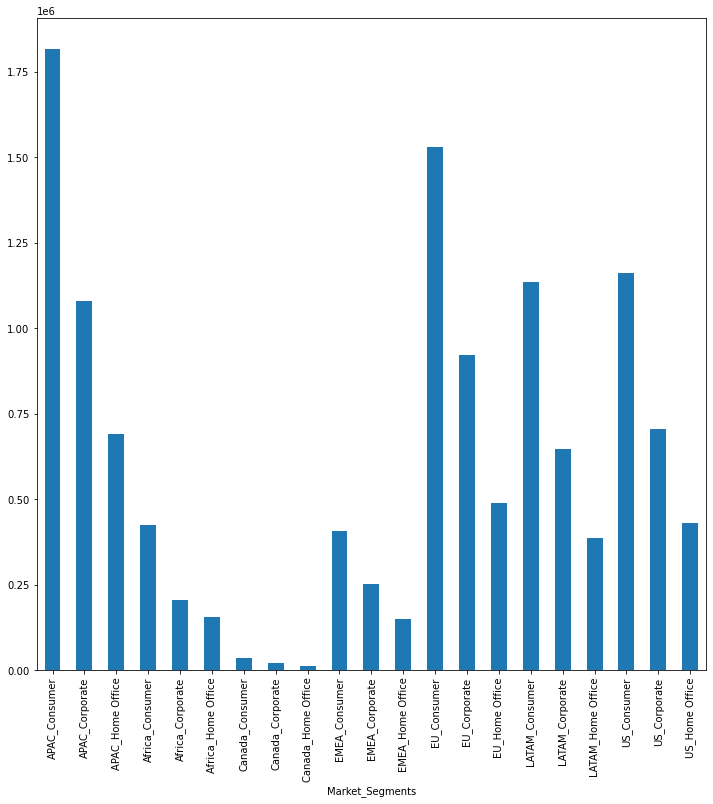

In [16]:
# Plotting Marget Segments Vs Sales
plt.figure(figsize=(12,12))
df.groupby(by='Market_Segments')['Sales'].sum().plot(kind='bar')
plt.show()


 * APAC_Consumer segments is the highest grossing in sales.

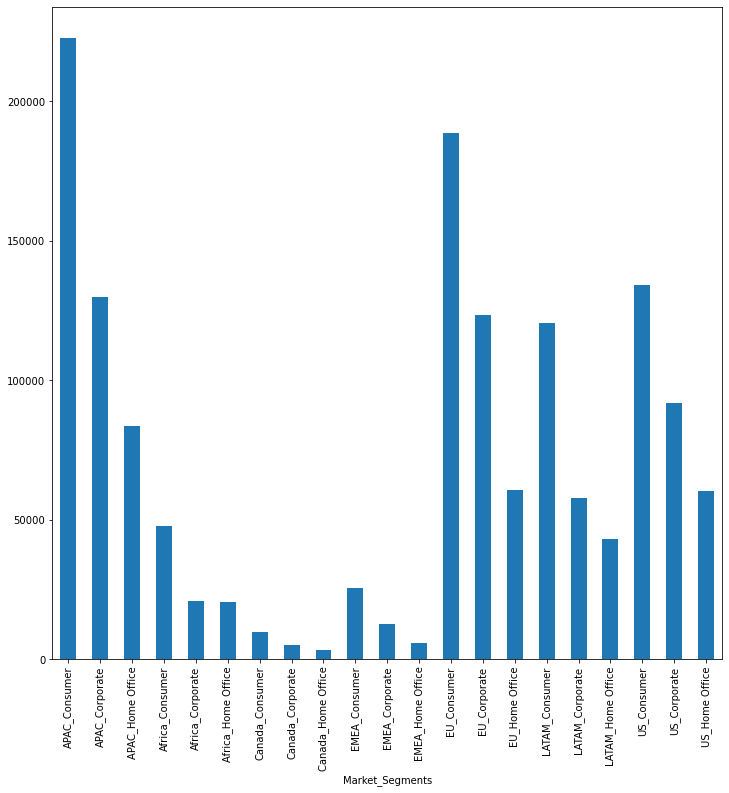

In [17]:
# Plotting Market Segments Vs Profit
plt.figure(figsize=(12,12))
df.groupby(by='Market_Segments')['Profit'].sum().plot(kind='bar')
plt.show()


* APAC_Consumer segments is the highest grossing in profit

In [18]:
# Dropping the columns Market and Segment
df=df.drop(['Market','Segment'],axis=1)
df.head()


,Order Date,Sales,Profit,Market_Segments
0,2012-07,2309.650,762.1845,US_Consumer
1,2013-02,3709.395,-288.7650,APAC_Corporate
2,2013-10,5175.171,919.9710,APAC_Consumer
3,2013-01,2892.510,-96.5400,EU_Home Office
4,2013-11,2832.960,311.5200,Africa_Consumer


### 2.2 Aggregation of Monthly Profit over each of the Markets Segments

In [19]:
# Creating a 'PIVOT TABLE'
df_profit=df.pivot_table(index='Order Date', values='Profit', columns='Market_Segments', aggfunc='sum')
df_profit.head()

Market_Segments,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [20]:
df_profit.shape

(48, 21)

The table above shows the aggregated profit over 48 months for each of 21 Market Segments.

In [21]:
#Train-Test Split of the 'PIVOT TABLE':df_profit such that the train consists of initial 42 months of data and the test set consists of the last 6 months data.
train_len=42
train=df_profit[:train_len]
test=df_profit[train_len:]


In [22]:
# to check the size of train data set
train.shape


(42, 21)

In [23]:
# to check the size of test data set
test.shape


(6, 21)

In [24]:
train.head()

Market_Segments,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


### 2.3 Calculate the CoV on the profit for each of the 21 market segments on the train data.
We compare the variance between the segments using the coefficient of variation which will normalise the standard deviation with the mean and give a comparative figure on the basis of which we can identify the most profitable market segment.
We want to forecast the sales where the market segment is reliable or in other words, there is less variation in the profits.

In [25]:
# Calculating Mean and Standard Deviation for each Market Segment
mean=np.mean(train)
std= np.std(train)

# Creating a DataFrame with Mean, Standard Deviation and Coeeficient of Variance(SD/Mean) for each Market Segment
CoV_df= pd.DataFrame(mean)
CoV_df['std']= std
CoV_df['CoV'] = std/mean
CoV_df= CoV_df.reset_index()
CoV_df.columns= ['Market_Segments', 'Mean', 'Std', 'CoV']
CoV_df.sort_values(by='CoV', ascending= True, inplace = True)
CoV_df

,Market_Segments,Mean,Std,CoV
0,APAC_Consumer,4223.553586,2518.944225,0.596404
12,EU_Consumer,3627.517036,2348.762579,0.647485
15,LATAM_Consumer,2252.677529,1533.362508,0.680684
13,EU_Corporate,2251.993036,1552.403019,0.689346
1,APAC_Corporate,2556.998957,1871.535073,0.731926
16,LATAM_Corporate,1075.994223,947.154491,0.880260
19,US_Corporate,1853.568607,1904.002356,1.027209
2,APAC_Home Office,1379.120743,1446.445137,1.048817
18,US_Consumer,2603.736252,2851.858407,1.095295
14,EU_Home Office,1097.441500,1223.296718,1.114681


In [26]:
Lowest_CoV_value =min(CoV_df["CoV"])
Lowest_CoV_value

0.5964039934193229

###  ** The Lowest CoV is for the market Segment APAC_Consumer which is also evident from EDA

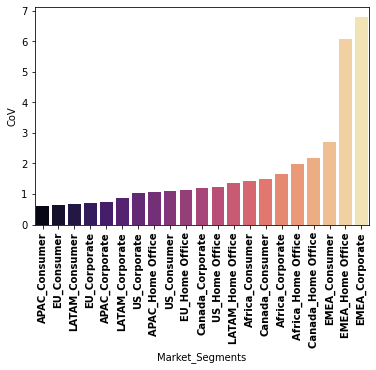

In [27]:
sns.barplot(x='Market_Segments', y= 'CoV', data=CoV_df, palette='magma')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()



Now that we have found out the most profitable market segment, the next task is to forecast the sales for the next 6 months for that market segment APAC_Consumer. For this, we need to check which time series model will work the best. So we will apply all the techniques in the Smoothing methods and the ARIMA set of methods to find the best model. 
* Before we start applying the methods,  we convert the Order-Date column from "DateTime" to "timestamp" and then start building the models. Thus, we will get a timestamp for each order date now as well.

In [28]:
# Checking the datatype of Column 'Order Date'
df['Order Date'].dtype

period[M]

In [29]:
# Converting period(M) to timestamp
df['Order Date'] = df['Order Date'].astype(str)
df['Order Date']=pd.to_datetime(df['Order Date'])


In [30]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [31]:
# As we need the data for APAC_Consumer only we drop the data for the rest 20 market segments from the original Dataset. 

retail_df= df[(df.Market_Segments=='APAC_Consumer')]
retail_df.head()

,Order Date,Sales,Profit,Market_Segments
2,2013-10-01,5175.171,919.971,APAC_Consumer
6,2011-11-01,1822.080,564.840,APAC_Consumer
7,2012-04-01,5244.840,996.480,APAC_Consumer
14,2013-06-01,3701.520,1036.080,APAC_Consumer
29,2012-02-01,1878.720,582.360,APAC_Consumer


In [32]:
# Checking the size of the data frame
retail_df.shape

(5699, 4)

Clearly, there are 5699 records for the category APAC_Consumer.

In [33]:
# Creating another DataFrame in the order of "Order Date" with aggregated sales for that timestamp.

data=pd.DataFrame(retail_df.groupby("Order Date")['Sales'].sum())
data.head()


,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


## 3. Time Series Analysis 

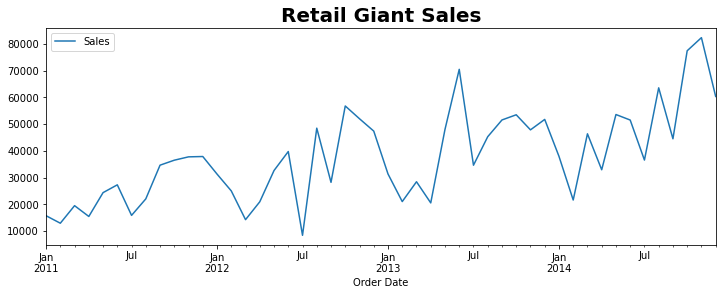

In [34]:
# Time Series Analysis performed on the data for the Market Segment 'APAC_Consumer' only.
# Plotting the Time Series Data 

data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold', size=20)
plt.show(block=False)


In [62]:
data.isnull().sum()

Sales    0
dtype: int64

No Null Values found in the data.

### 3.1 TRAIN-TEST Split 

In [63]:
train=data[:train_len]
test=data[train_len:]
train.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


### 3.2 Decomposing the Time Series Plot for Trend and Seasonality

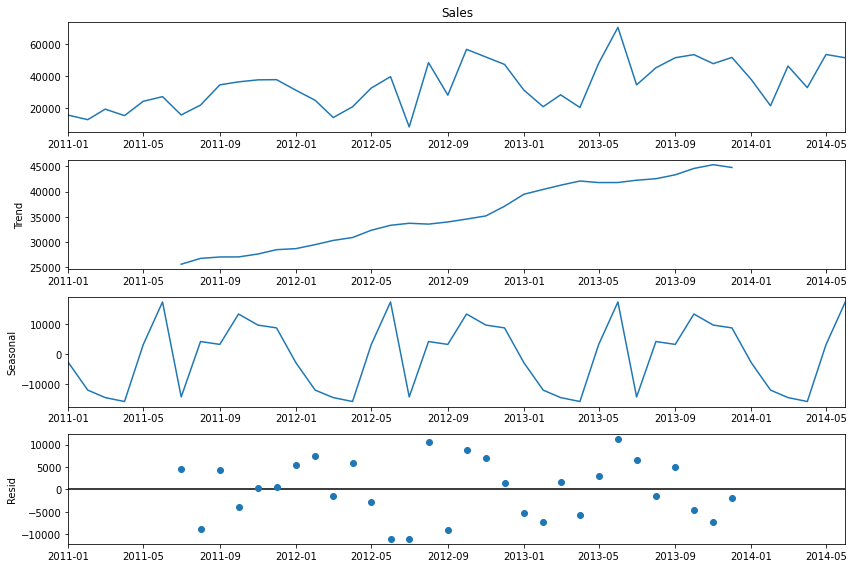

In [64]:
# Decomposition using additive seasonal index
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive')

fig = decomposition.plot()
plt.show()

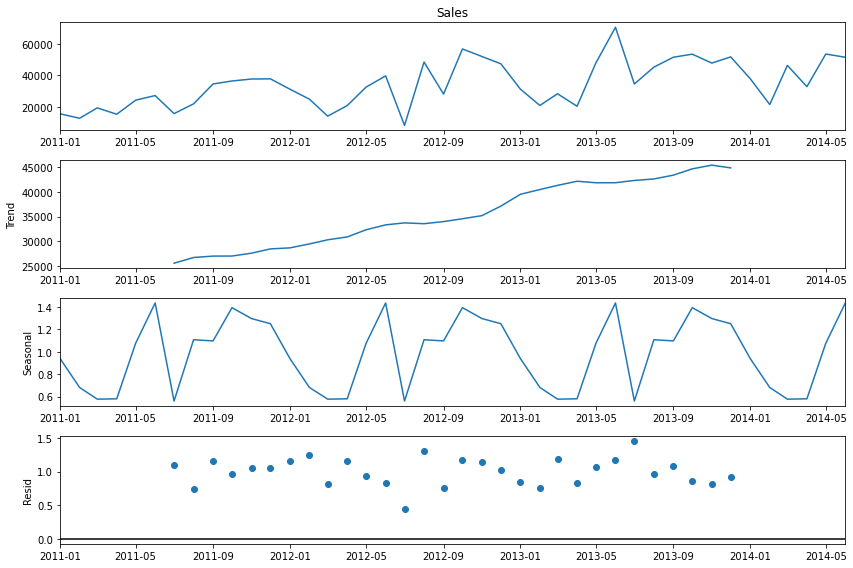

In [65]:
# Decomposition using multiplicative seasonal index
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') 

fig = decomposition.plot()
plt.show()

The elements of trend and seasonality are clearly visible from the patterns.

## 4. Model Buiding and Evaluation

### 4.1 Simple Forecasting Techniques

#### 4.11  Naive Method

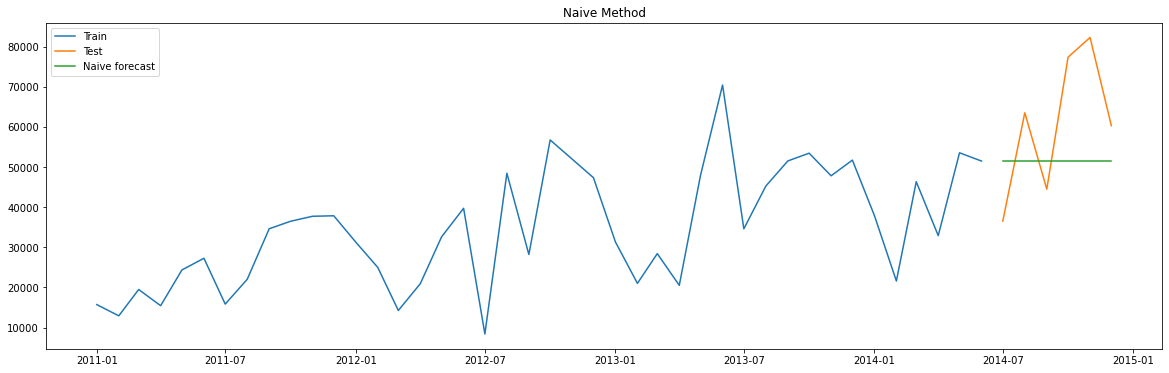

In [66]:
#Using the Naive Method for forecasting
y_hat_naive = test.copy()
y_hat_naive['Naive Forecast']=train['Sales'][train_len-1]
#Plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['Naive Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()


We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line.


In [67]:
#Calculating RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['Naive Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['Naive Forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive Forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86


#### 4.12 Simple Average Method

In [68]:
# Using Simple Average Method
y_hat_avg = test.copy()
y_hat_avg['Average Forecast']=train['Sales'].mean()


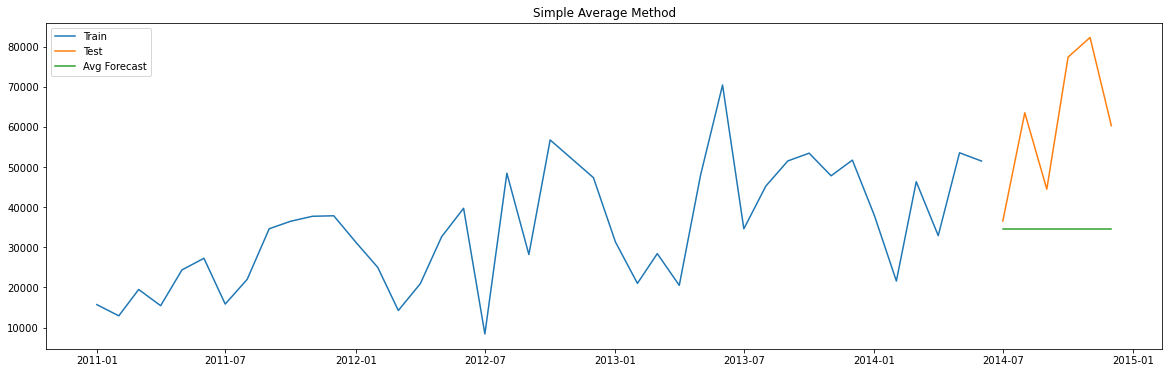

In [69]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Average Forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()


In [70]:
# Calculating RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Average Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['Average Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18


 The green line is the average of all the 42 months sales data.
 The green line we forecasted is not showing any trend or seasonality while our train and test data had both trend and seasonality.

### 4.2 Simple and Advanced Smoothing Techniques

#### 4.21 Simple Moving Average Technique

In [71]:
# Using Simple Moving Average Method 
y_hat_sma=data.copy()
ma_window=2
y_hat_sma['sma_forecast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

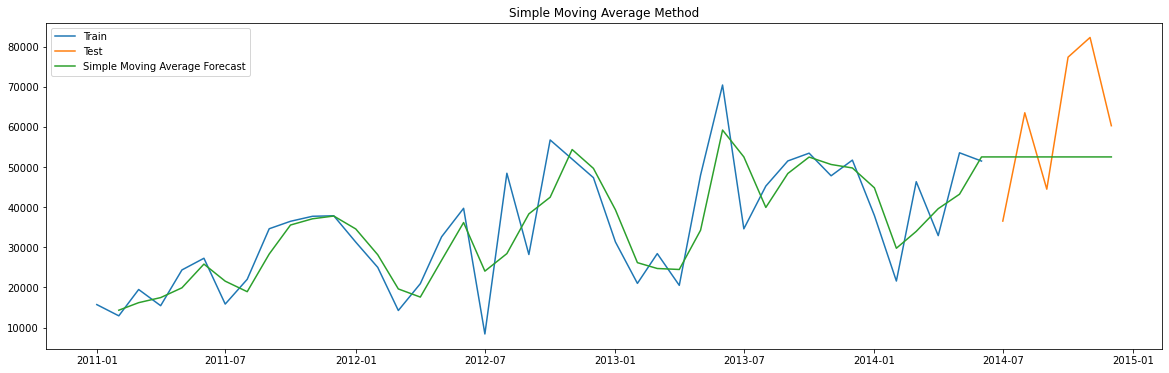

In [72]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [73]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73


#### 4.22 Simple Exponential Smoothing Technique

In [74]:
#Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


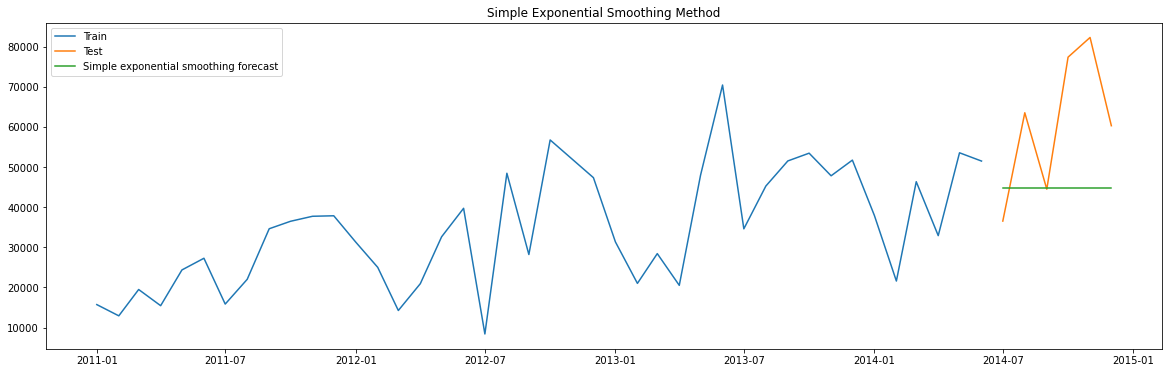

In [75]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

* Simple Exponential Smoothing technique captures the level of the curve and does not display any trend and seasonality.

In [76]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results


,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70


#### 4.23 Holt's Exponential Smoothing Technique

In [77]:
# Holt's method with trend
# Assuming Trend to be Additive

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.45285714285714285, 'smoothing_trend': 0.0646938775510204, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.7125, 'initial_trend': -2800.8536999999997, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


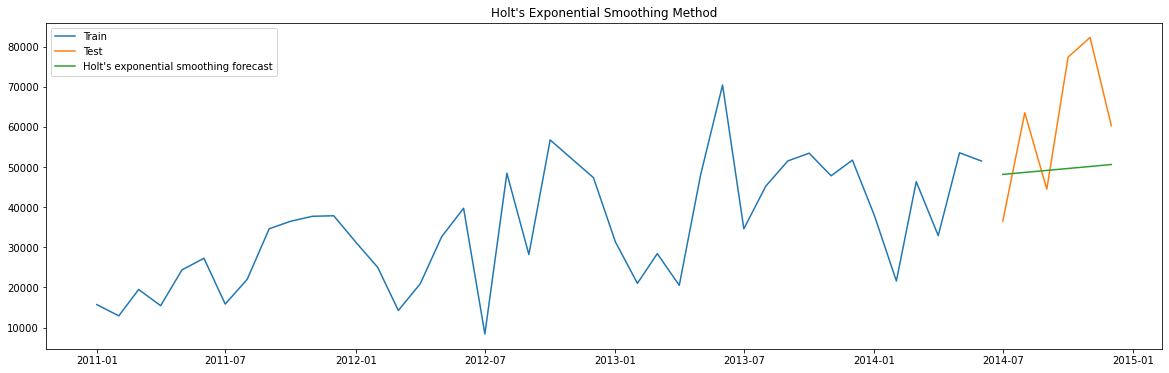

In [78]:
# Plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

Holt's Smoothing Technique captures level and trend.

In [79]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12


#### 4.24 Holt's Winter Exponontial Smoothing Technique

In [80]:
# Holt's Winters Method
# Assuming Trend and Seasonality to be Additive
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HW_Forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


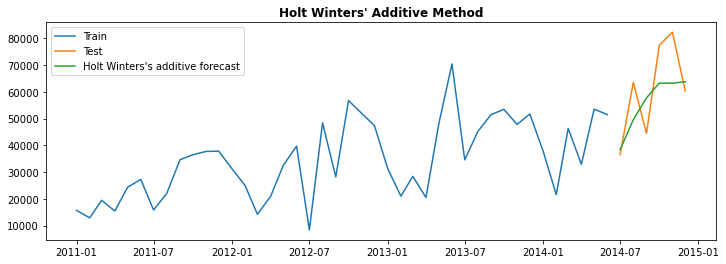

In [81]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['HW_Forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method',fontweight='bold')
plt.show()

In [82]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['HW_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['HW_Forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':["Holt Winter's Additive Method"], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32


In [83]:
#Assuming Trend to be Multiplicative and Seasonality to be Additive

from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)


{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


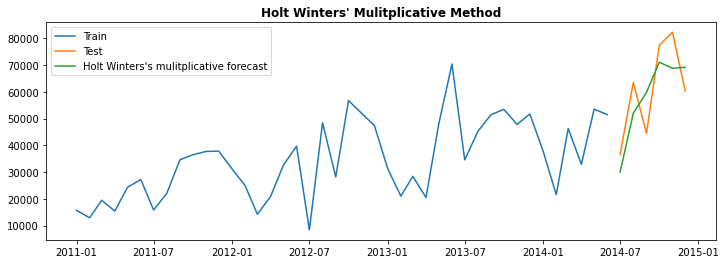

In [84]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27


### 4.3 Regression Models
####  4.31 Stationarity Test
#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

Null Hypothesis  (H0) : The series is stationary  p−value>0.05 
Alternate Hypothesis: (H1)  The series is not stationary  p−value<=0.05

In [86]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


Here p-value is < 0.05.Hence, The series is not stationary.

The two tools to convert a non-stationary series into stationary series are as follows:

1. Differencing
2. Transformation


#### Box-Cox Tranformation Method

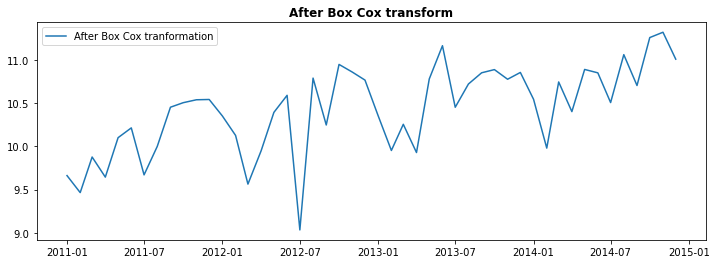

In [87]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Sales'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

Box-Cox transformation makes the variance constant

#### Differencing Method

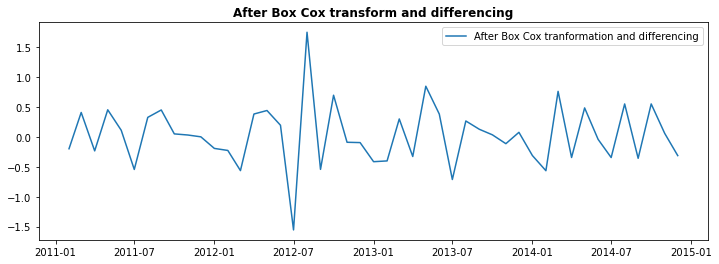

In [88]:

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()


Differencing removes the trend from mthe series.
The series looks Stationary.
The fluctuations are under constant limits.
The mean is also centered around zero.


In [89]:
data_boxcox_diff.dropna(inplace=True)

In [90]:
data_boxcox_diff.tail()


Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
dtype: float64

#### Augmented Dickey-Fuller (ADF) test

In [91]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])


ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


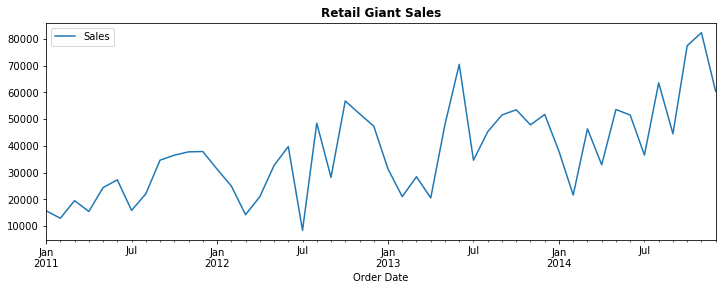

In [92]:
data['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

p-value is 0.0001 < 0.05, Reject the null hypothesis  (H0) 
The series is stationary.
#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [93]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])


KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


p-value is 0.100000 > 0.05. 
The series is stationary.
Hence, we are able to convert a non-stationary series to staionary series.

### Auto correlation Function ( ACF)

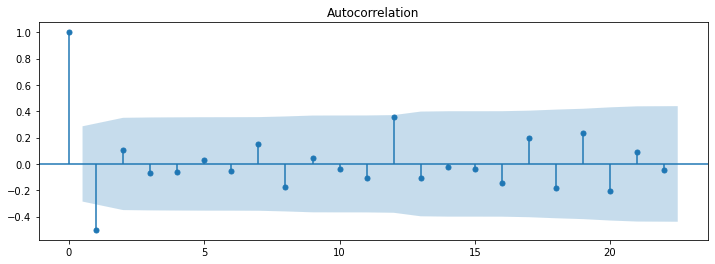

In [94]:
# The correlation of the time series observations with values of the same series at previous times(lags) is called autocorrelation.
# ACF describes the autocorrelation between observation and another observation at a prior time step that includes direct and indirect dependence information.

from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()

### Partial Autocorrelation Function( PACF)

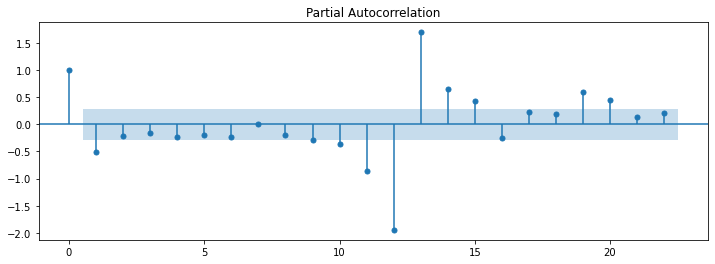

In [95]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 22)
plt.show()


### 4. Auto Regressive Models

#### Train Test Split

In [96]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]


#### 4.1 Auto Regression Method

In [97]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)


const      0.031320
ar.L1.y   -0.483978
dtype: float64


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [98]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])


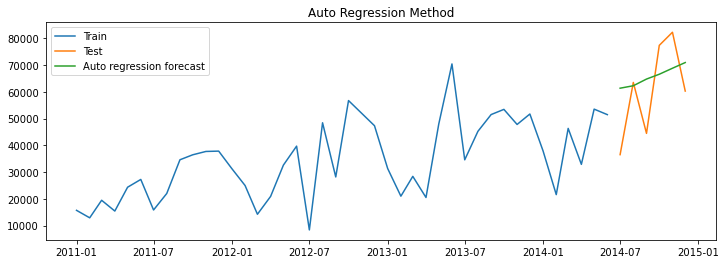

In [99]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

From the plot we can see that we are able to capture trend in the forecast but could not capture the seasonality.

In [100]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27


#### 4.2 Moving Average Method

In [101]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)


const      0.022694
ma.L1.y   -1.000000
dtype: float64


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])


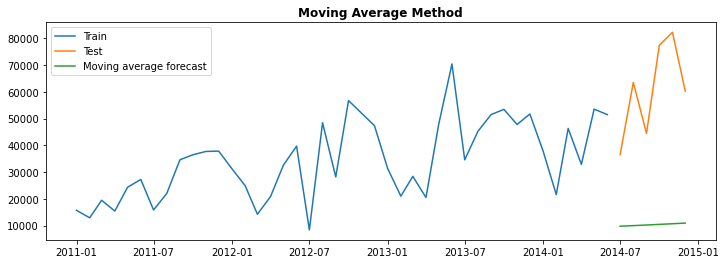

In [103]:
plt.figure(figsize=(12,4))
plt.plot(data['Sales'][:train_len], label='Train')
plt.plot(data['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()


In [104]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


#### 4.3 Auto Regression Moving Average Method (ARMA)

In [105]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)


const      0.022810
ar.L1.y    0.115928
ma.L1.y   -0.999954
dtype: float64


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [106]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

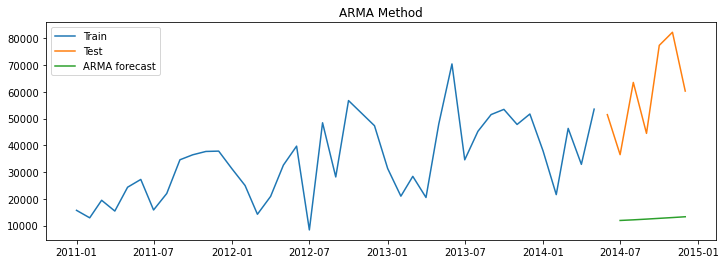

In [107]:
plt.figure(figsize=(12,4))
plt.plot( data['Sales'][:train_len-1], label='Train')
plt.plot(data['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [108]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.66,77.66


#### 4.4 Auto Regressive Integrated Moving Average (ARIMA)
ARIMA model has three parameters
p: Highest lag included in the regression model
d: Degree of differencing to make the series stationary
q: Number of past error terms included in the regression model
'd' is the differencing parameter. If d is 1, that means the series now has slope 0 and thus will have no trend. That means, the time series initially had trend.

In [109]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115928
ma.L1.D.y   -0.999954
dtype: float64


C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [110]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

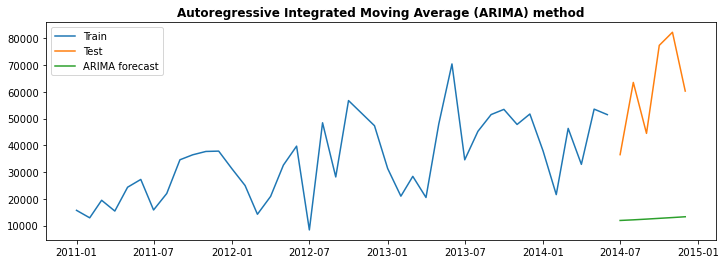

In [111]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive Integrated Moving Average (ARIMA) method', fontweight='bold')
plt.show()

In [112]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.66,77.66


#### 4.5 Seasonal Auto Regressive Integrated Moving Average (SARIMA)
SARIMA Model has both non seasonal elements and seasonal elements.
SARIMA brings all the features of an ARIMA model with an extra feature - seasonality.
SARIMA has six parameters along with seasonality.

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\subha_2rjikge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.100504
ma.L1      -0.994122
ar.S.L12   -0.394385
ma.S.L12   -0.986498
sigma2      0.047415
dtype: float64


In [114]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

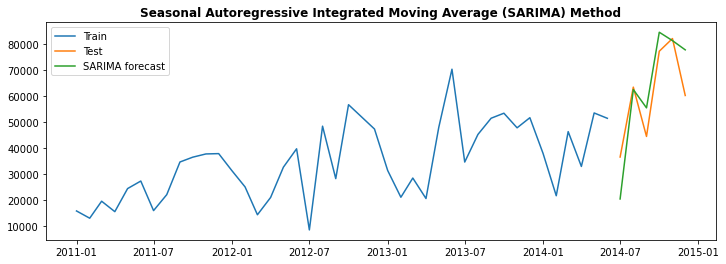

In [115]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Method',fontweight='bold')
plt.show()


In [116]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal Autoregressive Integrated Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winters' multiplicative method,10876.35,18.27
0,Autoregressive (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.66,77.66


### 5. Conclusion:
1. Out of all the methods of forecasting we observe that Holt Winter’s Additive Method, Holt Winter’s Multiplicative Method, and SARIMA Method have performed exceptionally well. And this is inline with our expectations. On decomposing the plot itself we had realized that the Sales have a trend and a seasonality. And both these methods Holt Winter’s and SARIMA can capture both unlike other models which can capture either of the two.
2. We also know that a time series of sales data may have some sort of seasonality attached to it as the sales of any item will not remain same throughout the given time period which is usually a year. It may also have a trend either positive or negative associated with it. As a result of this, Holt Winter’s Models and SARIMA models are the best suited models for sales forecasting. If an external factor is impacting the sale at some time intervals than SARIMAX Model can also be used for analysis and forecasting Sales.